<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/Grading_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Layer

Consider the grading method of this course.  Four assignments account for in total 30%, a project and a presentation each takes up 20%, and a final exam accounts for 30%.
Consider a (fictitious) grading cut: F(<50), D(50\~60), C(60\~75), B(75\~90) A(90\~100), without any subdivision. Assign an integer from 0 to 4 to each of them, with 0 being F and 4 being A.

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import csv

In [ ]:
letter_grade=["F","D","C","B","A"]
weight=[0.075, 0.075, 0.075, 0.075, 0.2, 0.2, 0.3]
np.random.seed
with open('grade_data.csv', mode='w') as sample_file:
    grade_writer = csv.writer(sample_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    grade_writer.writerow(['HW1','HW2','HW3','HW4','Project','Presentation','Exam','Grade',])
    for i in range (0, 1000):
        mark_temp=np.random.normal(60, 60, 7)
        #prevent marks from going out of the range [0,100]
        mark_temp=[max(p,0) for p in mark_temp]
        mark_temp=[min(p,100) for p in mark_temp]
        mark_weighted=np.dot(weight,mark_temp)
        grade=0
        if mark_weighted>=50:
          grade+=1
          if mark_weighted>=60:
            grade+=1
            if mark_weighted>=75:
              grade+=1
              if mark_weighted>=90:
                grade+=1
        mark_temp.append(grade)
        grade_writer.writerow(mark_temp)

In [ ]:
df = pd.read_csv('/content/grade_data.csv')
print(df)

            HW1         HW2         HW3         HW4    Project  Presentation  \
0     36.249140   21.124081  100.000000   63.508417  35.197116     51.120449   
1    100.000000  100.000000    0.000000   91.190683  45.595355     75.199435   
2    100.000000  100.000000  100.000000   54.632752  65.274875    100.000000   
3     34.898110    0.000000    0.000000   95.265725  68.939036     42.646325   
4     42.065471  100.000000    0.000000   63.812843  92.026085      0.000000   
..          ...         ...         ...         ...        ...           ...   
995   81.435463   76.115736   97.771826   37.634132   0.000000     91.815616   
996   55.649738    0.000000  100.000000   62.647968   1.452038     88.330421   
997    0.000000   57.878650   84.270310   72.206063  36.808877    100.000000   
998   34.257229   82.156567   48.827749  100.000000  73.022961    100.000000   
999  100.000000   76.830479  100.000000    0.000000  70.822358      0.000000   

           Exam  Grade  
0     27.33492

### Code Layer

For the representation of the hypothesis, we define <span style="border-bottom: dashed">sigmoid function</span> :
$$
h_{\theta}=\frac{1}{1+e^{-\theta^Tx}}
$$
Note that $\theta^Tx$ can be non-linear. 
    <br> <span style="border-bottom: dashed">Cost function</span> in logistic refression is defined as: 
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^m-ylog(h_\theta)-(1-y)log(1-h_\theta),
$$
and still, we can use gradient descent to minimize it.
    
<br>In addition, we use <span style="border-bottom: dashed">accuracy function</span> to see how well the algorithm works, which is defined as: 
$$
Accuracy=\frac{1}{m}\sum_{i=1}^{m}\delta_{predicted,real}
$$

The N-dimensional hyperplane that satisfies $z=\theta^{T}x=0$ is called the decision boundary.  Ideally, it separates two classes of samples.

$z\gt0$ implies the sample is more likely to belong to class $y=1$, and vise versa

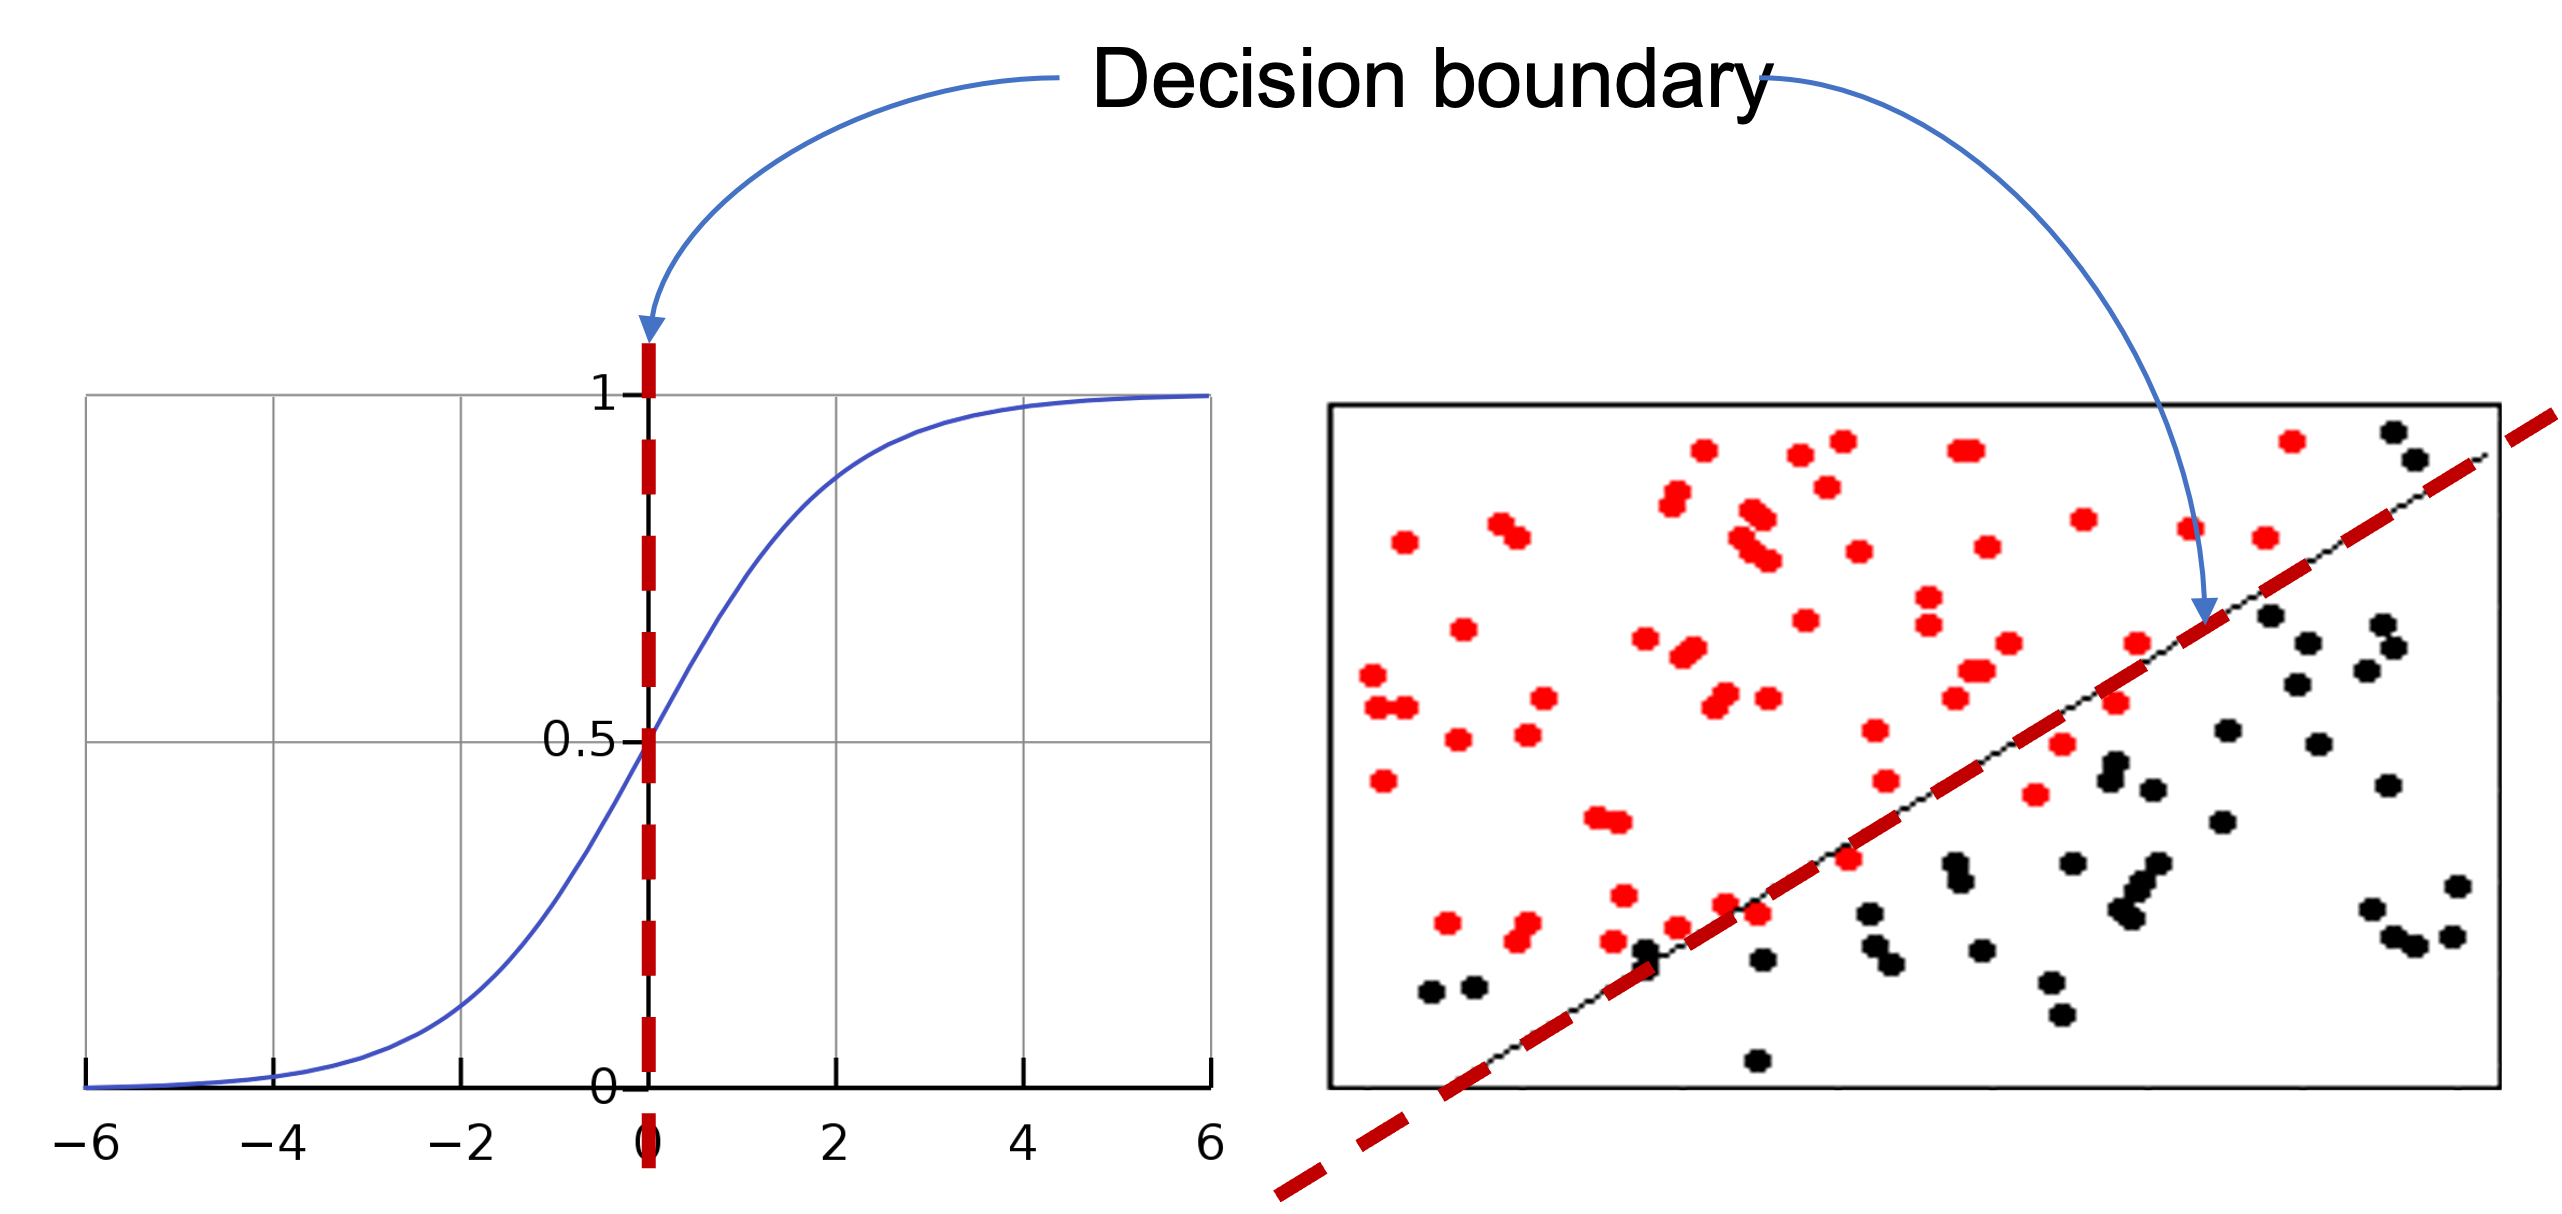

In [ ]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):  
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):     
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient, args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

Now, we pick the features and outcome out of the initial data.

In [ ]:
data = df
X = data.iloc[:, :7]        #features
grade = data.iloc[:, 7]         #outcome
X = np.c_[np.ones((X.shape[0], 1)), X]    #we need x_0

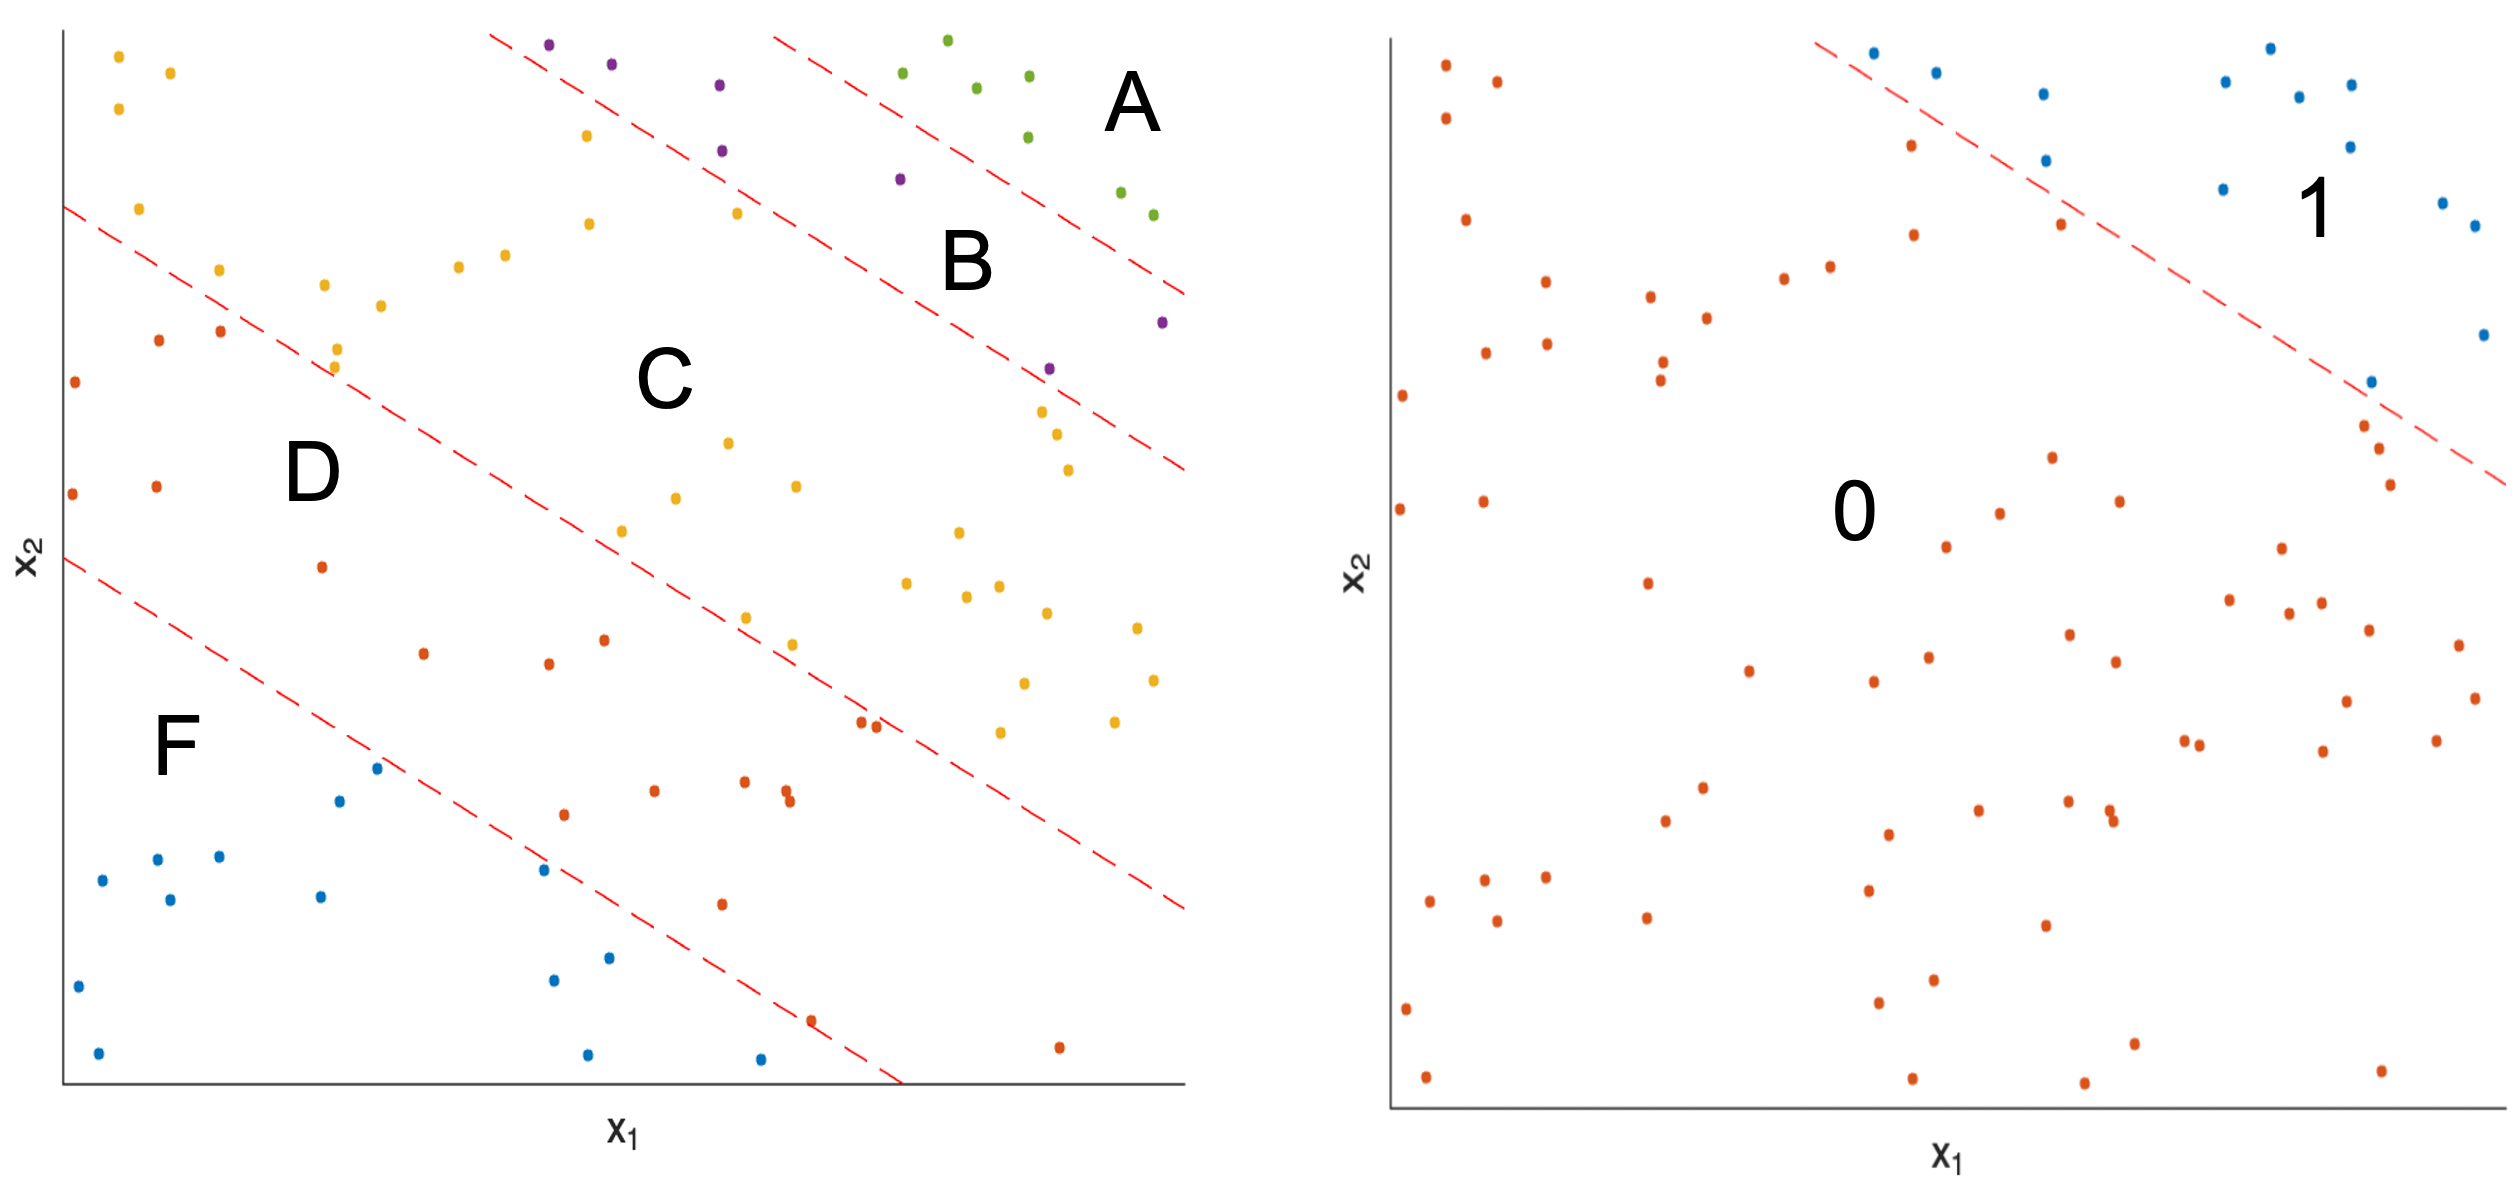

Input whether or not each sample is in or above B range.  Assign 0 to all of those below B range, and vice versa. This devides the sample into two different classes for us to perform logistic regression.

In [ ]:
cut_line=3
y = [g>=cut_line for g in grade]                 #devide sample by whether they are in or above B(3) range
y = np.array(y)
theta = np.zeros((X.shape[1], 1))

Implement the Logistic Regression algorithm.

In [ ]:
model1 = LogisticRegressionUsingGD()
model1.fit(X, y, theta)
accuracy = model1.accuracy(X, y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

<ipython-input-4-349e78460cf8>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


The accuracy of the model is 100.0
The model parameters got by Gradient descent:
[-8.97079318e+02  8.46116947e-01  9.34451800e-01  8.53017027e-01
  8.60690527e-01  2.45366453e+00  2.40635755e+00  3.58143347e+00]


<ipython-input-4-349e78460cf8>:24: RuntimeWarning: divide by zero encountered in log
  total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])


We normalize the parameters ($\theta$) by letting the sum of weight (excluding bias term) equal to 1, as it should be.  We can see the 7 weights we used to determine the grade of each sample and bias term being negative of cut line.

In [ ]:
parameters_normalized=parameters/sum(parameters[1:])
print("The cut line for", letter_grade[cut_line], "range is {}".format(-parameters_normalized[0]))
print("The weights of the 7 components are {}".format(parameters_normalized[1:]))

The cut line for B range is 75.15913809654148
The weights of the 7 components are [0.07088941 0.07829028 0.07146751 0.07211041 0.20557303 0.20160955
 0.30005981]


We can try the same by deviding in C range and reach the same result, except for the bias term

In [ ]:
cut_line=2
y = [g>=cut_line for g in grade]                 #devide sample by whether they are in or above C(2) range
y = np.array(y)
theta = np.zeros((X.shape[1], 1))

In [ ]:
model2 = LogisticRegressionUsingGD()
model2.fit(X, y, theta)
accuracy = model2.accuracy(X, y.flatten())
parameters = model2.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

<ipython-input-4-349e78460cf8>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


The accuracy of the model is 100.0
The model parameters got by Gradient descent:
[-1491.81164564     1.84531356     1.86653083     1.92945695
     1.84191534     4.99497452     4.9016153      7.48664545]


In [ ]:
parameters_normalized=parameters/sum(parameters[1:])
print("The cut line for", letter_grade[cut_line], "range is {}".format(-parameters_normalized[0]))
print("The weights of the 7 components are {}".format(parameters_normalized[1:]))

The cut line for C range is 59.992943438272754
The weights of the 7 components are [0.07420896 0.07506221 0.07759277 0.0740723  0.20087202 0.1971176
 0.30107413]


Consider the case where we cannot know about all relevant input. Is it still possible to get the result using remaining data.

In the following case we ignore the effect of the first two assignments which takes up 15% combined.

In [ ]:
X2 = data.iloc[:, 2:7]        #features (excluding first 2 columns)
grade = data.iloc[:, 7]         #outcome
X2 = np.c_[np.ones((X2.shape[0], 1)), X2]    #we need x_0

In [ ]:
cut_line=3
y = [g>=cut_line for g in grade]                 #devide sample by whether they are in or above B(3) range
y = np.array(y)
theta = np.zeros((X2.shape[1], 1))

In [ ]:
model3 = LogisticRegressionUsingGD()
model3.fit(X2, y, theta)
accuracy = model3.accuracy(X2, y.flatten())
parameters = model3.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

The accuracy of the model is 96.5
The model parameters got by Gradient descent:
[-34.4141174    0.04138935   0.04085416   0.10492733   0.10122372
   0.15178631]


This time we normalize the weights sum up to only 85%, but rescale the bias term up so that it is still out of 100 points.

Note that we can still get a close result for the remaining components with slightly less accuracy.

In [ ]:
parameters_normalized=parameters/sum(parameters[1:])*0.85
print("The cut line for", letter_grade[cut_line], "range is {}".format(-parameters_normalized[0]/0.85))
print("The weights of the remaining 5 components are {}".format(parameters_normalized[1:]))

The cut line for B range is 78.18176601653337
The weights of the remaining 5 components are [0.07992384 0.07889039 0.20261724 0.19546547 0.29310307]
